# Arbres de décision

## Construction

L'arbre est construit par partition récursive de la base d'apprentissage en fonction de la valeur de l'attribut testé à chaque itération

### Algorithme

 - Calculer l'**entropie** H de chaque attribut non utilisé, $H(S) - \sum_{i=1}^{n classes} p_i log(p_i)$ avec $p_i =\frac {|C_i|} {|S|}$
 - Choisir l'attribut de **Gain d'Info** _GI(S;a)_ max, $GI(S;a) = H(S) - \sum_{i=1}^{n classes} p_i H(S_i)$ avec $p_i =\frac {|S_i|} {|S|}$
 - Créer un noeud test (décision) sur cet attribut & les sous-noeuds correspondants
 
Sortie de la récursivité:
 
 - Tous les éléments de S sont de la même classe (H(S) = 0) => S devient un noeud feuille

### Classification & Regression Trees (CART)

 - Uniquement des questions binaires à chaque noeud
 - I(S): fonction d'impureté
 - **Fonction coût à minimiser**: $E[I(S_{gd})] = p_{gauche} I(p_{gauche}) + p_{droite} I(p_{droite})$
 
#### Classification

**Index de Gini** / **Impureté** à optimiser

$$
I_G(S) = \sum p_i (1 - p_i) = 1 - \sum p_i^2
$$

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
iris = load_iris()
X = iris['data']
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [3]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 0.9333333333333333)

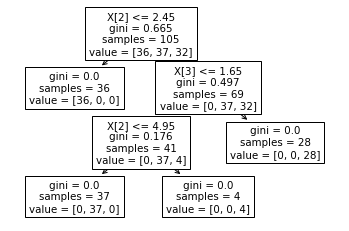

In [4]:
_ = plot_tree(clf, impurity = True)

L'erreur d'apprentissage est égale à 1 mais une erreur de test plus faible. L'arbre a appris l'ensemble du jeu de données

 - Problème de généralisation
 - Sur-apprentissage
 - Arbres de grandes taille
 
Options:

 - Contrôler l'arbre via ces hyper-paramètres (taille de l'arbre, nombre d'éléments par feuille, ...)
 - Bagging. 
 
Construire plusieurs arbres?

Les arbres nes sont pas indépendants.

$var(Y) = \rho \sigma^2 + \frac {1 - \rho} {B}\sigma^2$ avec $\rho = corr(X_i, X_j)$, i et j, deux tirages d'échantillons. $\rho \sigma^2$ non négligeable si B grand.
 
Solutions:

   * Random Forests (On tire B échantillons avec remise, on garde q attributs parmi p)
   * Extra-Tree Features   

In [5]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth = 2)
clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.9809523809523809, 0.9333333333333333)

<BarContainer object of 4 artists>

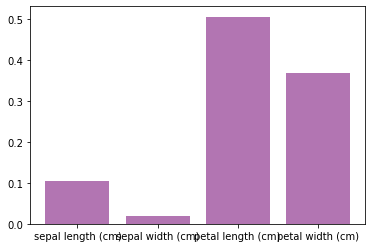

In [6]:
import matplotlib.pyplot as plt
plt.bar(iris.feature_names, clf.feature_importances_, color = (0.5,0.1,0.5,0.6))